In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This is a messy first draft of my final. You can see how I based my research based off the code below.
# The final version is the v2  ipynb. Think of this as a planning sheet

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/banana_quality_dataset.csv")
df.head() #check out the data table

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


In [ ]:
#Check to see if any null, NA, or missing data
df.isnull().sum()

,0
sample_id,0
variety,0
region,0
quality_score,0
quality_category,0
ripeness_index,0
ripeness_category,0
sugar_content_brix,0
firmness_kgf,0
length_cm,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

In [ ]:
df.describe()

,sample_id,quality_score,ripeness_index,sugar_content_brix,firmness_kgf,length_cm,weight_g,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.465160,4.042170,18.516830,2.706840,19.882100,164.738930,10.879600,723.556700,1972.992800,104.391300
std,288.819436,0.540909,1.753211,2.034812,1.289252,5.736318,49.163073,5.215554,427.372855,564.467912,53.607794
min,1.000000,0.920000,1.020000,15.000000,0.500000,10.000000,81.050000,2.000000,0.400000,1000.500000,10.000000
25%,250.750000,2.090000,2.447500,16.827500,1.590000,14.902500,122.397500,6.300000,353.950000,1498.750000,60.150000
50%,500.500000,2.440000,4.110000,18.500000,2.680000,19.890000,163.365000,10.700000,726.000000,1957.400000,104.100000
75%,750.250000,2.850000,5.562500,20.312500,3.820000,24.800000,205.775000,15.600000,1071.725000,2431.800000,149.850000
max,1000.000000,3.890000,7.000000,21.980000,5.000000,29.950000,249.890000,20.000000,1498.400000,2992.000000,199.900000


In [ ]:
df.variety.unique()

array(['Manzano', 'Plantain', 'Burro', 'Red Dacca', 'Fehi', 'Lady Finger',
       'Blue Java', 'Cavendish'], dtype=object)

In [ ]:
variety_map = {'Manzano':1,'Plantain':2,'Burro':3,'Red Dacca':4,'Fehi':5,'Lady Finger':6,'Blue Java':7,'Cavendish':8}
df['variety'] = df['variety'].map(variety_map)
df

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,1,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,2,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,3,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,1,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,4,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,Ecuador,3.50,Good,4.94,Ripe,21.06,2.49,27.95,196.35,2023-10-04,12.4,409.7,2029.9,173.0
996,997,8,Philippines,2.38,Processing,6.74,Overripe,16.10,2.00,12.39,165.55,2023-09-23,14.0,314.3,1330.7,180.5
997,998,2,Ecuador,1.68,Processing,1.41,Green,17.17,2.28,16.56,210.08,2023-10-19,18.4,683.0,2955.4,189.9
998,999,5,Guatemala,2.02,Processing,1.34,Green,17.03,2.88,26.31,162.50,2023-09-22,8.2,1362.7,1215.8,85.5


In [ ]:
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
discrete_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

variables_classification = {
    'Categorical Variables': categorical_vars,
    'Discrete Variables': discrete_vars
}

variables_classification

{'Categorical Variables': ['region',
  'quality_category',
  'ripeness_category',
  'harvest_date'],
 'Discrete Variables': ['sample_id',
  'variety',
  'quality_score',
  'ripeness_index',
  'sugar_content_brix',
  'firmness_kgf',
  'length_cm',
  'weight_g',
  'tree_age_years',
  'altitude_m',
  'rainfall_mm',
  'soil_nitrogen_ppm']}

In [ ]:
new_df = df[['variety',
  'quality_score',
  'ripeness_index',
  'sugar_content_brix',
  'firmness_kgf',
  'length_cm',
  'weight_g',
  'tree_age_years',
  'altitude_m',
  'rainfall_mm',
  'soil_nitrogen_ppm']]


In [ ]:
new_df.head()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   variety             1000 non-null   int64  
 1   quality_score       1000 non-null   float64
 2   ripeness_index      1000 non-null   float64
 3   sugar_content_brix  1000 non-null   float64
 4   firmness_kgf        1000 non-null   float64
 5   length_cm           1000 non-null   float64
 6   weight_g            1000 non-null   float64
 7   tree_age_years      1000 non-null   float64
 8   altitude_m          1000 non-null   float64
 9   rainfall_mm         1000 non-null   float64
 10  soil_nitrogen_ppm   1000 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

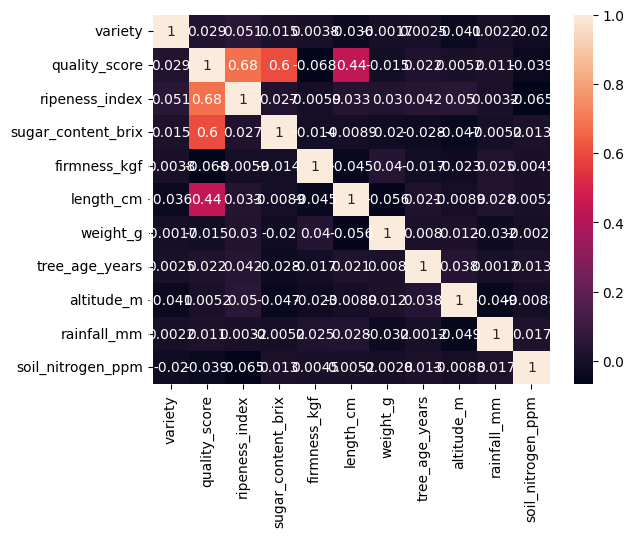

In [ ]:
correlation = new_df.corr()
sns.heatmap(correlation, annot=True)
results_path = 'results.png'
#print(results_path)
plt.savefig(results_path, dpi=400)

In [ ]:
X_simple = df[['ripeness_index']]
y = df['quality_score']

# Initialize the model
model_simple = LinearRegression()
model_simple.fit(X_simple, y)

LinearRegression()

In [ ]:
X = new_df.drop(['quality_score','firmness_kgf','weight_g','tree_age_years','altitude_m','rainfall_mm','soil_nitrogen_ppm'], axis=1)
y = new_df['quality_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X

,variety,ripeness_index,sugar_content_brix,length_cm
0,1,2.11,16.83,21.44
1,2,4.25,16.73,26.11
2,3,6.24,21.34,25.20
3,1,5.39,16.75,13.08
4,4,5.84,16.90,12.98
...,...,...,...,...
995,3,4.94,21.06,27.95
996,8,6.74,16.10,12.39
997,2,1.41,17.17,16.56
998,5,1.34,17.03,26.31


In [ ]:
X_test.iloc[20]

,549
variety,1.00
ripeness_index,4.80
sugar_content_brix,15.46
length_cm,25.97


In [ ]:
model.predict([X_test.iloc[20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38336345])

In [ ]:
model.score(X_test, y_test)

0.980915925263891

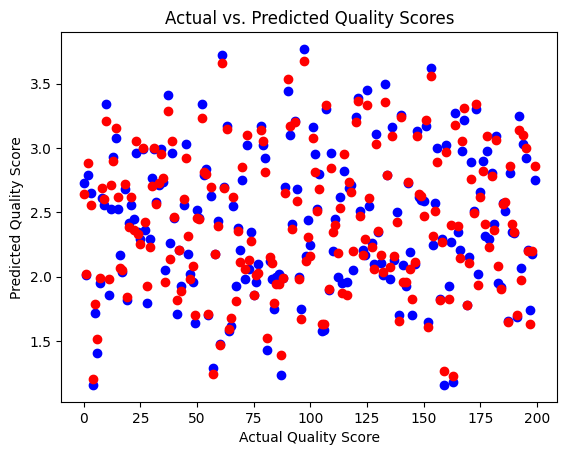

In [ ]:
y_pred = model.predict(X_test)

plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.xlabel('Actual Quality Score')
plt.ylabel('Predicted Quality Score')
plt.title('Actual vs. Predicted Quality Scores')
plt.show()

In [ ]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
cdf

,Coefficient
variety,0.000069
ripeness_index,0.200505
sugar_content_brix,0.155442
length_cm,0.039737


              Feature  Coefficient Estimate
0             variety              0.000069
1      ripeness_index              0.200505
2  sugar_content_brix              0.155442
3           length_cm              0.039737


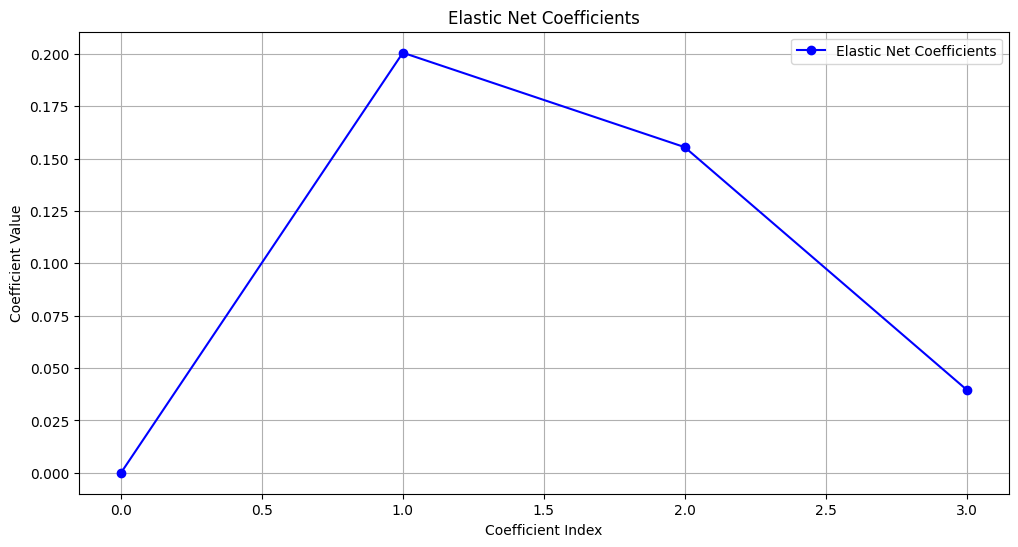

In [ ]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(model.coef_)
print(coeff_df)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(model.coef_, marker='o', linestyle='-', color='b', label='Elastic Net Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Elastic Net Coefficients")
plt.legend()
plt.grid(True)
plt.show()